<a href="https://colab.research.google.com/github/kyata/introduction_to_ml_with_python/blob/master/chapter2_3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pythonで始める機械学習 第2章
===

# 2.3.8 ニューラルネットワーク(ディープラーニング)


## 多層パーセプロトロン(multilayer percepton : MLP)

$$
\hat y = w[0] \times x[0] + x[1] \times w[1] + \cdots + w[p] \times x[p] +b
$$

$ \hat y \$ : 入力特徴量x[0]からx[p]までの重み付き和 

$ w[0..p] \$ :  学習された係数


In [0]:
# いつもの
!pip install mglearn

import mglearn
import numpy as np
import matplotlib.pyplot as plt

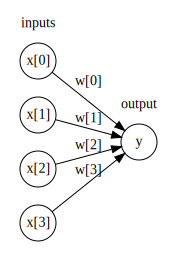

In [0]:
display(mglearn.plots.plot_logistic_regression_graph()

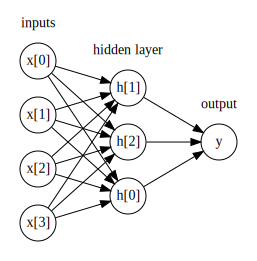

In [0]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 計算順序
    1. 中間処理ステップを表す**隠れユニット**の計算で重み付き和が行われる
    1. 隠れユニットの値に対して重み付き和が行われる
    1. 1と2の値を加算して結果が算出される

- このモデルは学習しなければならない係数がいっぱい
    - すべての入力ノードとすべての隠れユニットの間に１つずつ
    - すべての隠れ層のユニットと出力ノード間に１つずつ
    
- 一連の重み付き和を計算することは  
  ***数学的には１つの重み付き和を計算することと同じ***
  
- 線形モデルよりも強力にするために...
    - 個々の隠れユニットの重み付き和を計算し、その結果に対して**非線形関数を適用**

## 非線形関数
    - relu(rectified linear unit: 正規化線形関数)
        - ゼロ以下の値を切り捨てる
    
    - tanh(hyperbolic tangent: 双曲正接関数)
        - 小さい値は-1にする
        - 大きい値は+1にする
        
    - いずれの非線形関数もニューラルネットワークが線形モデルよりも
    複雑な関数を学習することを可能になる


Text(0, 0.5, 'relu(x), tanh(x)')

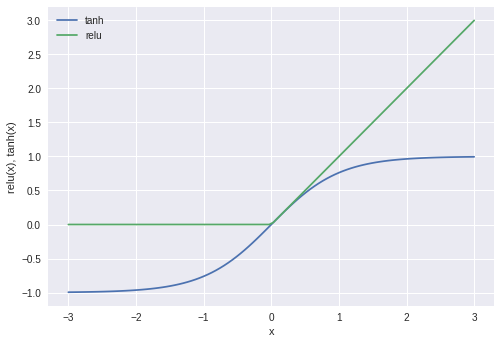

In [0]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- 小さなニューラルネットワークで回帰を行う場合の $\ \hat y$ を計算する式
$$
h[0] = tanh(w[0, 0], \times x[0] + w[1, 0] \times w[2, 0], \times x[2] + w[3, 0] \times x[3] + b[0] ) \\
h[1] = tanh(w[0, 1], \times x[0] + w[1, 1] \times w[2, 1], \times x[2] + w[3, 1] \times x[3] + b[0] ) \\
h[2] = tanh(w[0, 2], \times x[0] + w[1, 2] \times w[2, 2], \times x[2] + w[3, 2] \times x[3] + b[0] ) \\
\hat y = v[0] \times h[0] + v[1] \times + h[1] + v[2] \times h[2] + b
$$



$$
x : 入力特徴量 \\
\hat y : 計算結果 \\
v, w := データから学習される重み \\
w : 入力xと隠れ層hの間の重み \\
v : 隠れ層hと出力\hat yの間の重み \\
$$

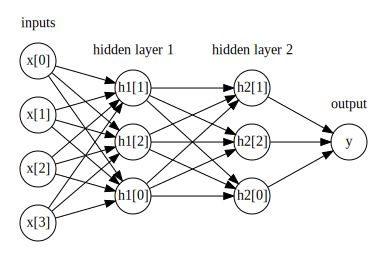

In [0]:
mglearn.plots.plot_two_hidden_layer_graph()

 ## パラメータ
 
- 隠れ層のノード数
    - 小さい場合は10
    - 複雑なデータでは10,000とか


## ニューラルネットワークのチューニング

- MLPClassifierをtwo_moonsデータ・セットに適用してMLP使ってみる

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

NameError: ignored